<h1>Kurvendiskussion mit SciPy</h1>

$$y=f(x)=x^5-15x^4+85x^3-225x^2+274x-120$$

Nullstellen
 [1. 2. 3. 4. 5.]
Wendepunkte
 [2.50001195 2.00001024 4.00001707]


/Users/jonporsche/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:452: RuntimeWarning: RMS of 2.30926e-14 reached
  warnings.warn(


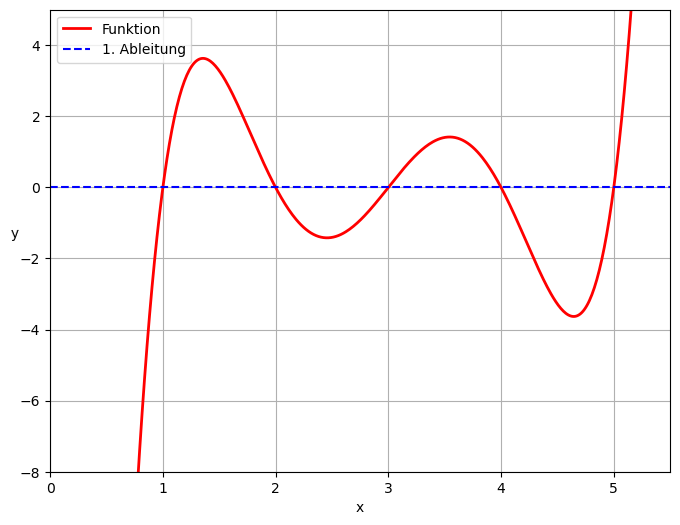

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import newton

h = 1e-307  # Schrittweite = 0,0000001
x1, x2 = 0, 5.5
y1, y2 = -8, 5
plt.figure(figsize=(8, 6))
plt.xlim(x1, x2)
plt.ylim(y1, y2)


def f(x):
    y = x ** 5 - 15 * x ** 4 + 85 * x ** 3 - 225 * x ** 2 + 274 * x - 120
    return y


def df_1(x):
    return derivative(f, x, dx=h)


def df_2(x):
    return derivative(df_1, x, dx=h)


x = np.linspace(x1, x2, 500)

# Set tolerance for convergence
tolerance = 1e-17

xi = newton(f, [0.5, 1.7, 3.1, 4.5, 6], tol=tolerance)
m = newton(df_1, [1.3, 2.5, 3.6, 4.6], tol=tolerance)
w = newton(df_2, [2.5, 2, 4], tol=tolerance)

print("Nullstellen\n", xi)

for i in range(len(m)):
    if df_2(m[i]) < 0:
        print("Maxima x=", m[i], "y=", f(m[i]))
    elif df_2(m[i]) > 0:
        print("Minima x=", m[i], "y=", f(m[i]))

print("Wendepunkte\n", w)

# Funktionsgrafen zeichnen
plt.plot(x, f(x), lw=2, color='r', label='Funktion')
plt.plot(x, df_1(x), 'b--', label='1. Ableitung')
# plt.plot(x,df_2(x),'g-.',label='2. Ableitung')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y', rotation=True)
plt.grid(True)
plt.show()